### In this lab, I will improve the previously generated linear regression model by adding categorical data to the X dataframe 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
df1 = pd.read_csv("./marketing_customer_analysis4.csv")
pd.set_option('display.max_columns', None)
display(df1.head())

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,location code,marital status,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,February
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,January
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,February
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,January
4,IW72280,California,5035.035257,No,Basic,Doctor,2011-02-14,Employed,F,37405,Urban,Married,63,8.0,99,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,A,January


In [2]:
numerical = df1.select_dtypes('number')
numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer lifetime value        9134 non-null   float64
 1   income                         9134 non-null   int64  
 2   monthly premium auto           9134 non-null   int64  
 3   months since last claim        9134 non-null   float64
 4   months since policy inception  9134 non-null   int64  
 5   number of open complaints      9134 non-null   float64
 6   number of policies             9134 non-null   int64  
 7   total claim amount             9134 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 571.0 KB


In [3]:
### I will improve the linear regression model by adding categorical data 

categorical = df1.select_dtypes("object")
categorical = categorical.drop(["customer", "effective to date", "vehicle type", "month"], axis = 1)
categorical
categorical = pd.get_dummies(categorical, categorical.columns, drop_first=True)
categorical
categorical.shape
numerical = pd.concat([numerical, categorical], axis = 1)
numerical.shape

(9134, 51)

In [4]:
### X,y split 

y = numerical["total claim amount"]
x = numerical.drop(["total claim amount"], axis = 1)

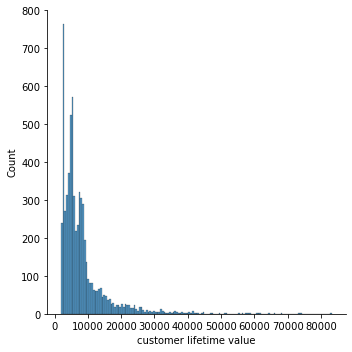

In [5]:
### Train-test split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 50)
sns.displot(x_train['customer lifetime value'])

### I need to transform the customer lifetime value column in the x_train and x_test 

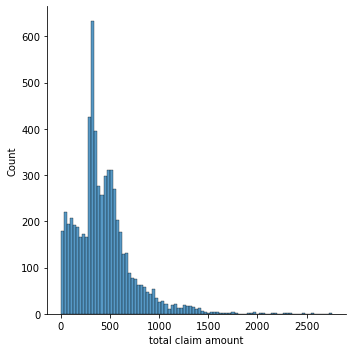

In [6]:
sns.displot(y_train)

### Also the y_train and y_test data 

y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

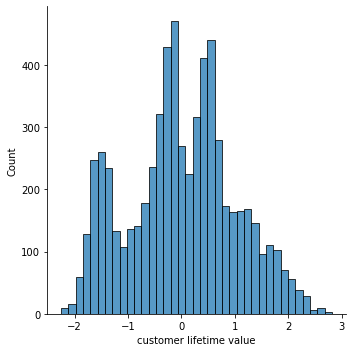

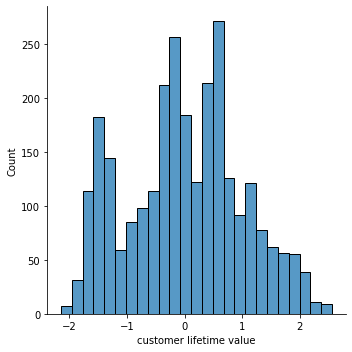

In [7]:
### Here I transform the customer lifetime value columns in the x_train and x_test dataset. I dont think the other 
### columns need to be transformed 

pt = PowerTransformer()
x_train_pt = x_train.copy()
pt.fit(x_train_pt[['customer lifetime value']])
x_train_pt['customer lifetime value'] = pt.transform(x_train_pt[['customer lifetime value']])

x_test_pt = x_test.copy()
pt.fit(x_test_pt[['customer lifetime value']])
x_test_pt['customer lifetime value'] = pt.transform(x_test_pt[['customer lifetime value']])

sns.displot(x_train_pt['customer lifetime value'])
sns.displot(x_test_pt['customer lifetime value'])

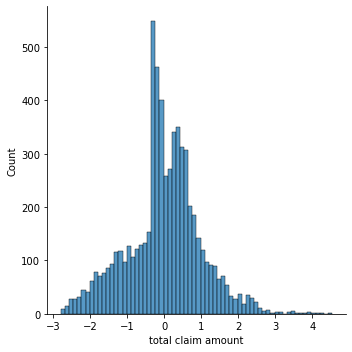

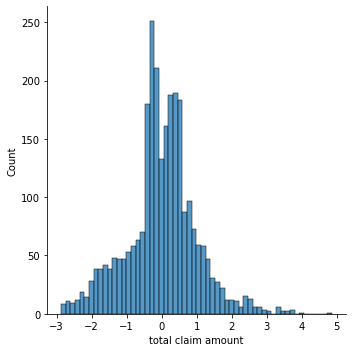

In [8]:

### Here I transform the y_train and y_test

y_train_pt = y_train.copy()
pt.fit(y_train_pt[['total claim amount']])
y_train_pt['total claim amount'] = pt.transform(y_train_pt[['total claim amount']])

y_test_pt = y_test.copy()
pt.fit(y_test_pt[['total claim amount']])
y_test_pt['total claim amount'] = pt.transform(y_test_pt[['total claim amount']])

sns.displot(y_train_pt['total claim amount'])
sns.displot(y_test_pt['total claim amount'])

In [9]:
### Now I am normalizing the x_train_pt and x_test_pt data 

transformer = MinMaxScaler().fit(x_train_pt)
x_train_pt_norm = transformer.transform(x_train_pt)
x_train_pt_norm = pd.DataFrame(x_train_pt_norm, columns=x_train_pt.columns)
x_train_pt_norm

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,education_Master,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed,gender_M,location code_Suburban,location code_Urban,marital status_Married,marital status_Single,policy type_Personal Auto,policy type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew offer type_Offer2,renew offer type_Offer3,renew offer type_Offer4,sales channel_Branch,sales channel_Call Center,sales channel_Web,vehicle class_Luxury Car,vehicle class_Luxury SUV,vehicle class_SUV,vehicle class_Sports Car,vehicle class_Two-Door Car,vehicle size_Medsize,vehicle size_Small
0,0.709389,0.492234,0.172996,0.000000,0.828283,0.6,0.125,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.447821,0.941329,0.054852,0.800000,0.414141,0.0,0.875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.182876,0.368510,0.050633,0.285714,0.111111,0.0,0.000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.367652,0.581000,0.240506,0.885714,0.838384,0.0,0.000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.432002,0.530881,0.050633,0.028571,0.101010,0.0,0.500,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6388,0.521653,0.523579,0.016878,0.942857,0.181818,0.2,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
6389,0.361557,0.225753,0.008439,0.828571,0.515152,0.0,1.000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6390,0.477433,0.000000,0.000000,0.114286,0.686869,0.0,0.125,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
6391,0.513321,0.615957,0.000000,0.514286,0.939394,0.0,0.125,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [10]:
transformer = MinMaxScaler().fit(x_test_pt)
x_test_pt_norm = transformer.transform(x_test_pt)
x_test_pt_norm = pd.DataFrame(x_test_pt_norm, columns=x_test_pt.columns)
x_test_pt_norm

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,education_Master,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed,gender_M,location code_Suburban,location code_Urban,marital status_Married,marital status_Single,policy type_Personal Auto,policy type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew offer type_Offer2,renew offer type_Offer3,renew offer type_Offer4,sales channel_Branch,sales channel_Call Center,sales channel_Web,vehicle class_Luxury Car,vehicle class_Luxury SUV,vehicle class_SUV,vehicle class_Sports Car,vehicle class_Two-Door Car,vehicle size_Medsize,vehicle size_Small
0,0.868174,0.000000,0.217021,0.657143,0.202020,0.0,0.125,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.385390,0.000000,0.046809,0.114286,0.616162,0.2,0.375,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.571283,0.420618,0.178723,0.200000,0.121212,0.0,0.250,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.545136,0.000000,0.187234,0.000000,0.161616,0.0,0.375,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.290562,0.000000,0.204255,0.628571,0.050505,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2736,0.394390,0.216937,0.280851,0.000000,0.707071,0.0,0.000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2737,0.635442,0.648509,0.289362,0.028571,0.787879,0.0,0.375,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2738,0.587277,0.838796,0.055319,0.628571,0.949495,0.6,0.125,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2739,0.092526,0.000000,0.008511,0.600000,0.616162,0.0,0.000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [11]:
### Now I am applying the linear regression model

lm = LinearRegression()
lm.fit(x_train_pt_norm, y_train_pt)
y_pred_train_pt = lm.predict(x_train_pt_norm)
y_pred_test_pt = lm.predict(x_test_pt_norm)
y_pred_train_pt = lm.predict(x_train_pt_norm)
y_pred_test_pt = lm.predict(x_test_pt_norm)
y_pred_train = pt.inverse_transform(y_pred_train_pt)
y_pred_test = pt.inverse_transform(y_pred_test_pt)
r2_train = r2_score(y_pred_train, y_train)
r2_test = r2_score(y_pred_test, y_test)
mse_train = mean_squared_error(y_pred_train, y_train)
mse_test = mean_squared_error(y_pred_test, y_test)
mae_train = mean_absolute_error(y_pred_train, y_train)
mae_test = mean_absolute_error(y_pred_test, y_test)
mape_train = mean_absolute_percentage_error(y_pred_train, y_train)
mape_test = mean_absolute_percentage_error(y_pred_test, y_test)

print("R2 score of trained dataset is", r2_train)
print("R2 score of test dataset is", r2_test)
print("Mean squared error of trained dataset is", mse_train)
print("Mean squared error of test dataset is", mse_test)
print("Mean absolute error of train dataset is", mae_train)
print("Mean absolute error of test dataset is", mae_test)
print("Mean absolute percentage error of train dataset is", mape_train)
print("Mean absolute percentage error of test dataset is", mape_test)
print(lm.intercept_)
print(lm.coef_)

### The model was improved. R2 score is much higher and mse, mae and mape are lower 


R2 score of trained dataset is 0.7213253759161518
R2 score of test dataset is 0.7099813754516592
Mean squared error of trained dataset is 16492.11659835343
Mean squared error of test dataset is 16685.01884018915
Mean absolute error of train dataset is 85.45968817266584
Mean absolute error of test dataset is 85.18381533994102
Mean absolute percentage error of train dataset is 0.2572625799689172
Mean absolute percentage error of test dataset is 0.2452008936825785
[-1.86477498]
[[ 4.57896344e-02 -8.56463335e-02  3.07446679e+00  2.08455506e-02
  -1.93043499e-02 -1.41341863e-02  1.39704836e-02  7.26394731e-03
  -5.20479072e-03 -1.37132624e-02  2.24593400e-02 -4.72264025e-02
   2.59085359e-02  6.35766199e-02 -2.53560112e-02 -2.71932155e-02
   4.77379233e-02 -1.04849711e-02  2.03613428e-03  5.77945446e-02
  -7.51989089e-03  1.90564714e-01  4.18320626e-02  1.72973944e+00
   1.18768739e+00 -2.22237098e-02  1.63750346e-01  5.44929178e-04
   4.88824782e-02 -3.26400177e-02 -2.92986563e-02  1.60298

/Users/origenolet/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
/Users/origenolet/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
